In [1]:
!pip install -q scikit-learn

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sklearn.__version__)

1.4.2


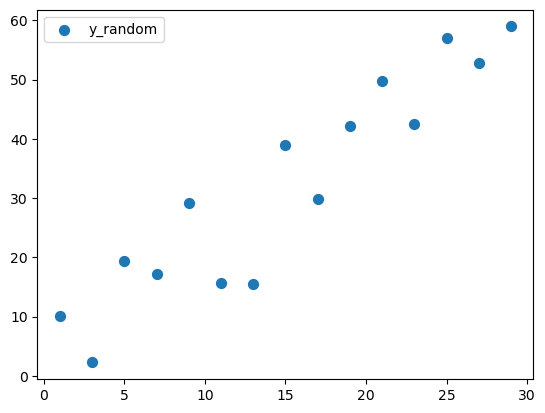

In [19]:
## 회귀분석
np.random.seed(910)
x = np.arange(1, 30, 2)
y = 2*x + 1 # coeff = 2, intercept = 1
y_random = y + np.random.normal(0,8, len(y))
# plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x,y_random, s = 50, label = "y_random")
plt.legend()
plt.show()

In [20]:
x_mean = np.mean(x)
y_mean = np.mean(y_random)
Sxy = sum((x - x_mean) * (y_random - y_mean))
Sxx = sum((x- x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))


b1 =  1.901
b0 =  3.566


y_random =  [10.1  2.3 19.4 17.1 29.2 15.6 15.5 38.9 29.9 42.2 49.7 42.4 57.  52.9
 59. ]
yhat =  [ 22.7   7.9  40.4  36.1  59.1  33.2  33.1  77.6  60.4  83.7  98.1  84.2
 111.9 104.  115.7]


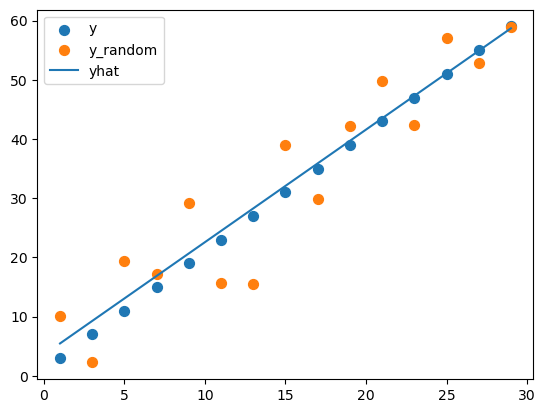

In [25]:
print("y_random = ",y_random.round(1))
print("yhat = ",(b1*y_random + b0).round(1))

yhat = b1*x + b0

# ## 회귀분석
# np.random.seed(910)
# x = np.arange(1, 30, 2)
# y = 2*x + 1 # coeff = 2, intercept = 1
# y_random = y + np.random.normal(0,8, len(y))

plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x,y_random, s = 50, label = "y_random")
plt.plot(x, yhat ,label = "yhat")
plt.legend()
plt.show()

In [41]:
## 라이브러리 사용
from sklearn.linear_model import LinearRegression


In [31]:
x_2d = x.reshape(-1, 1)
# x_2d


array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23],
       [25],
       [27],
       [29]])

In [32]:
## class - instance
lr = LinearRegression()
lr.fit(x_2d, y_random)

In [33]:
## fitting
lr.fit(x_2d, y_random)

LinearRegression()

In [34]:
## print
print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_)


coeff =  [1.90073609]
intercept =  3.566406385768893


In [35]:
## score / R-Square
lr.score(x_2d, y_random)

0.8679805034799591

In [53]:
## 문제
'''
cars 자료를 읽고 설명변수 speed 와 반응변수 dist 를 이용하여 회귀분석을 실시
'''

file_path = 'C:/Users/user/Desktop/SESAC 교육과정/SESAC - ML/Docs/dataset/cars.csv'
cars = pd.read_csv(file_path)


print(cars.head())

   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16


In [55]:
## summary statics
print("Summary statistic :")
print(cars.agg(["mean","std","median","min","max"]).round(3))

Summary statistic :
         speed     dist
mean    15.400   42.980
std      5.288   25.769
median  15.000   36.000
min      4.000    2.000
max     25.000  120.000


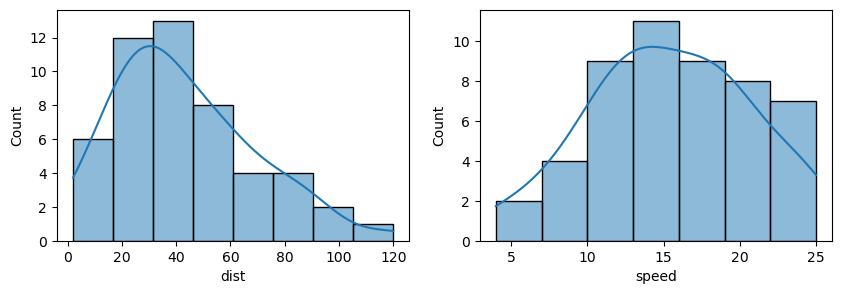

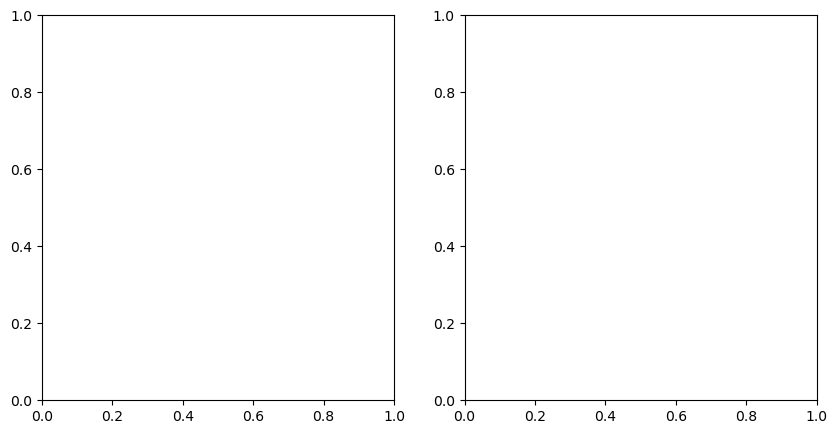

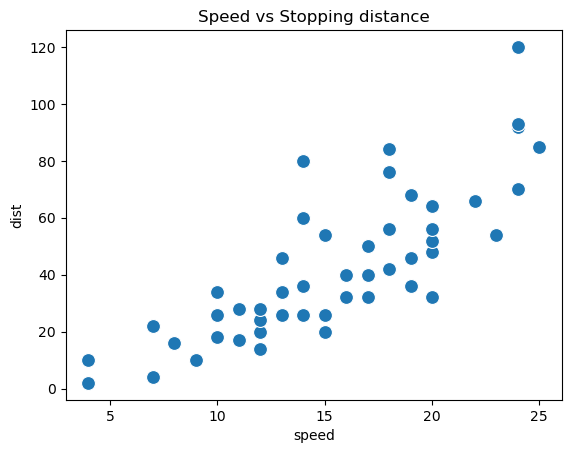

In [99]:
## Graph
fig, axs = plt.subplots(1, 2, figsize = (10,3))
sns.histplot(cars, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars, x = "speed", ax = axs[1],kde = True)

plt.show()

##
fig, axe = plt.subplots(1,2, figsize = (10,5))
plt.show()


## 
sns.scatterplot(cars, x = "speed", y = "dist", s = 100)
plt.title("Speed vs Stopping distance")
plt.show()

In [67]:
cars[["speed"]]

,speed
0,4
1,4
2,7
3,7
4,8
5,9
6,10
7,10
8,10
9,11


In [66]:
lr = LinearRegression()
lr.fit(cars[["speed"]], cars["dist"])

LinearRegression()

In [69]:
##
print("coeff = ", lr.coef_[0].round(3))
print("intercept = ", lr.intercept_.round(3))


coeff =  3.932
intercept =  -17.579


In [79]:
print("R-squared = ", lr.score(cars[["speed"]], cars["dist"]))

R-squared =  0.6510793807582509


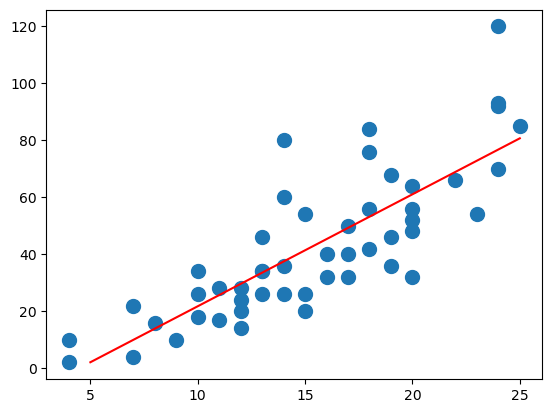

In [73]:
x_line = np.linspace(5, 25, 10)
plt.scatter(x = "speed", y ="dist", data = cars, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, c = "r")
plt.show()